In [100]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [101]:
# set wd
os.chdir('/Users/tildeidunsloth/Desktop/DatSci_25')


In [102]:
# import the data
df = pd.read_csv('data/preprocessed/cleaned_data.csv')

In [103]:
# explore the data
print(df.head())

              Datetime   Invoice ID Branch       City Customer type  Gender  \
0  2019-01-01 10:39:00  765-26-6951      A     Yangon        Normal    Male   
1  2019-01-01 11:36:00  746-04-1077      B   Mandalay        Member  Female   
2  2019-01-01 11:40:00  271-77-8740      C  Naypyitaw        Member  Female   
3  2019-01-01 11:43:00  133-14-7229      C  Naypyitaw        Normal    Male   
4  2019-01-01 13:55:00  651-88-7328      A     Yangon        Normal  Female   

          Product line  Unit price  Quantity  Tax 5%  ...   Time      Payment  \
0    Sports and travel       72.61         6  21.783  ...  10:39  Credit card   
1   Food and beverages       84.63        10  42.315  ...  11:36  Credit card   
2    Sports and travel       29.22         6   8.766  ...  11:40      Ewallet   
3    Health and beauty       62.87         2   6.287  ...  11:43         Cash   
4  Fashion accessories       65.74         9  29.583  ...  13:55         Cash   

     cogs gross margin percentage  gro

In [104]:
print(df.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating         Hour  \
count             1.000000e+03   1000.000000  1000.00000  1000.000000   
mean              4.761905e+00     15.379369     6.97270    14.910000   
std               6.131498e-14     11.708825     1.71858     3.186857   
min               4.761905e+00      0.508500     4

In [105]:
# count unique dates
print(df['Date'].nunique())

89


In [106]:
# Set datetime index 
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.set_index('Datetime')

### Plots

In [117]:
# Resample daily total sales
daily_sales = df['Total'].resample('D').sum()

# Resample hourly total sales
df_open_hours = df.between_time("10:00", "20:00")
hourly_sales = df_open_hours['Total'].resample('H').sum()

# Resample daily number of customers
daily_customers = df['Invoice ID'].resample('D').nunique()

# Resample hourly number of customers
hourly_customers = df_open_hours['Invoice ID'].resample('H').nunique()

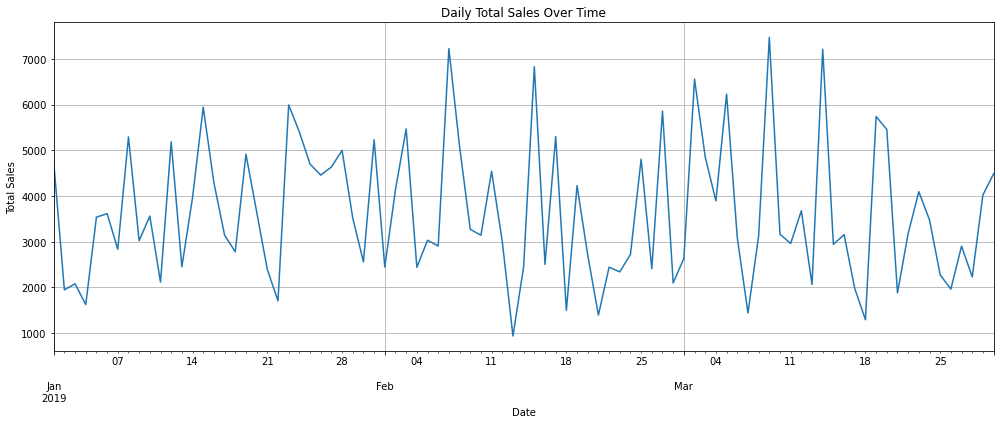

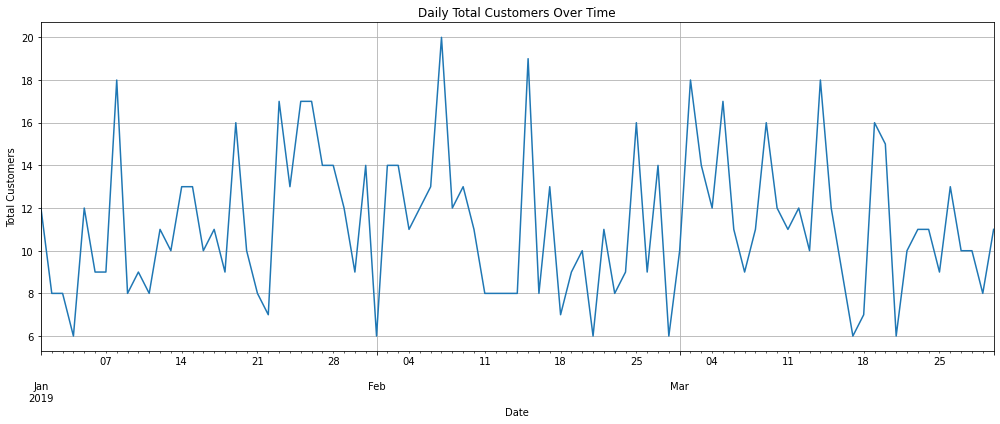

In [118]:
# Daily total sales
plt.figure(figsize=(14, 6))
daily_sales.plot()
plt.title('Daily Total Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

# Daily total customers
plt.figure(figsize=(14, 6))
daily_customers.plot()
plt.title('Daily Total Customers Over Time')
plt.ylabel('Total Customers')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 720x288 with 0 Axes>

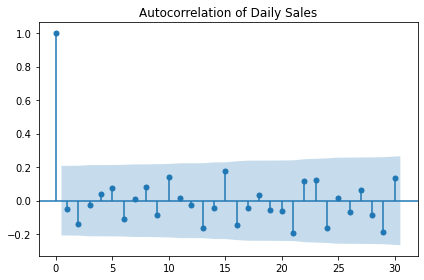

<Figure size 720x288 with 0 Axes>

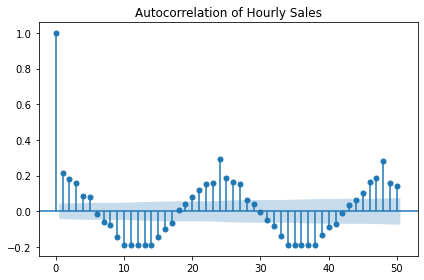

<Figure size 720x288 with 0 Axes>

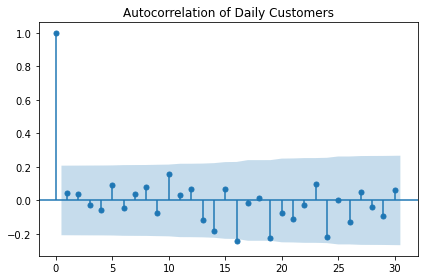

<Figure size 720x288 with 0 Axes>

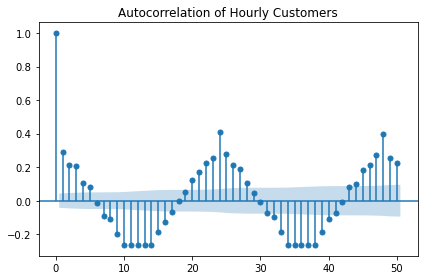

In [120]:
plt.figure(figsize=(10, 4))
plot_acf(daily_sales.dropna(), lags=30)  # 30 days
plt.title('Autocorrelation of Daily Sales')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plot_acf(hourly_sales.dropna(), lags=50)  # 50 hours = 5 days
plt.title('Autocorrelation of Hourly Sales')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plot_acf(daily_customers.dropna(), lags=30)  # 30 days
plt.title('Autocorrelation of Daily Customers')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plot_acf(hourly_customers.dropna(), lags=50)  # 50 hours = 5 days
plt.title('Autocorrelation of Hourly Customers')
plt.tight_layout()
plt.show()

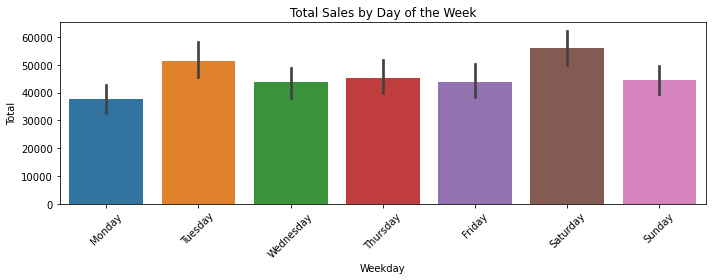

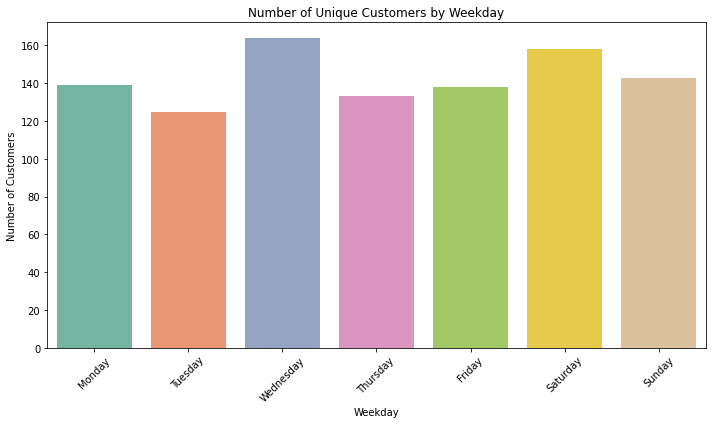

In [122]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Weekday', y='Total', data=df, estimator=np.sum, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Total Sales by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by weekday and count unique customers
weekday_customers = df.groupby('Weekday')['Invoice ID'].nunique()

# Plot by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_customers.index, y=weekday_customers.values, palette='Set2')
plt.title('Number of Unique Customers by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Customers')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.tight_layout()
plt.show()

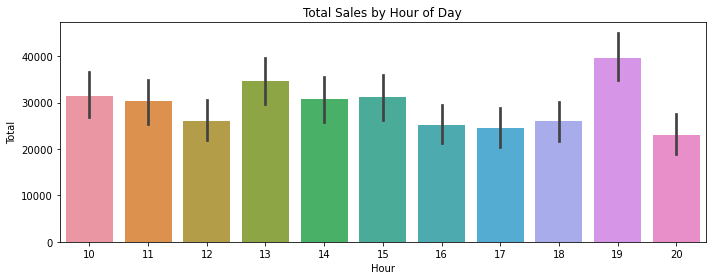

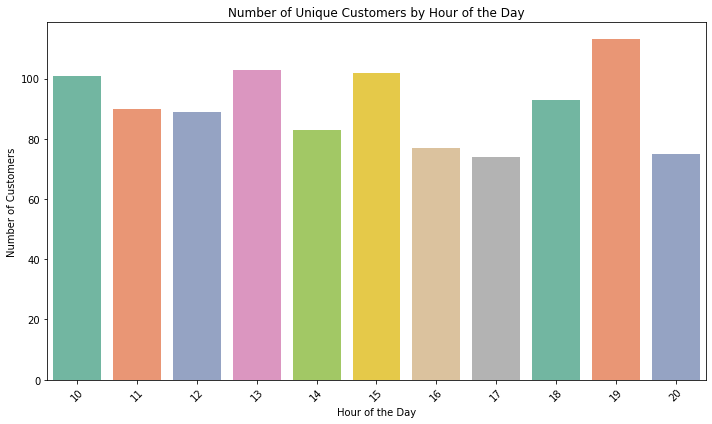

In [123]:
df['Hour'] = df.index.hour

plt.figure(figsize=(10, 4))
sns.barplot(x='Hour', y='Total', data=df, estimator=np.sum)
plt.title('Total Sales by Hour of Day')
plt.tight_layout()
plt.show()

# Count unique customers per hour
hourly_customers = df.groupby('Hour')['Invoice ID'].nunique()

# Plot hourly customers
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_customers.index, y=hourly_customers.values, palette='Set2')
plt.title('Number of Unique Customers by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

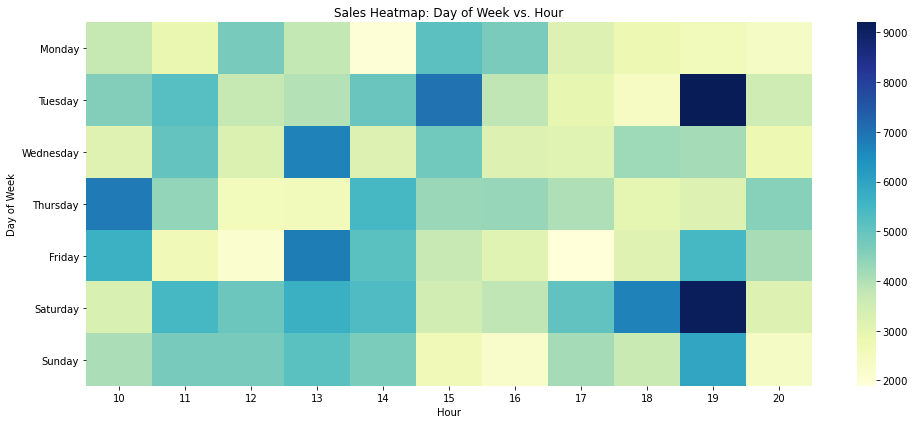

In [114]:
pivot = df.pivot_table(values='Total', index='Weekday', columns='Hour', aggfunc='sum')
pivot = pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Sales Heatmap: Day of Week vs. Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()